In [ ]:
import pandas as pd
import numpy as np

In [2]:
#load csv file data with headers

location = "../datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [4]:
import statsmodels.formula.api as smf

In [5]:
df_cuts = df['cut'].unique()
def cut_to_number(x):
    if x=='Ideal':
        return 1
    if x=='Premium':
        return 2
    if x=='Very Good':
        return 3
    if x=='Good':
        return 4
    if x=='Fair':
        return 5
df['cut_number'] = df['cut'].apply(cut_to_number)


In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_number
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4


In [7]:
result = smf.ols('cut_number ~ carat + depth + price', data=df).fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cut_number   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1795.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:45:30   Log-Likelihood:                -79920.
No. Observations:               53940   AIC:                         1.598e+05
Df Residuals:                   53936   BIC:                         1.599e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9879      0.198    -40.336      0.000      -8.376      -7.600
carat          1.2211      0.025     48.771      0.000       1.172       1.270
depth          0.1550      0.003     48.215      0.000       0.149       0.161
price         -0.0001   2.97e-06    -39.729      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     3322.577   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3656.833
Skew:                           0.611   Prob(JB):                         0.00
Kurtosis:                       2.636   Cond. No.                     2.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Remove depth from regression
result = smf.ols('price ~ cut_number + carat', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.583e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:47:25   Log-Likelihood:            -4.7180e+05
No. Observations:               53940   AIC:                         9.436e+05
Df Residuals:                   53937   BIC:                         9.436e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1781.0846     16.844   -105.738      0.000   -1814.099   -1748.070
cut_number  -257.9922      5.923    -43.555      0.000    -269.602    -246.382
carat       7838.4500     13.953    561.761      0.000    7811.101    7865.799
==============================================================================
Omnibus:                    14337.754   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156283.724
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                      11.112   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# 
result = smf.ols('price ~ cut_number + carat + depth - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.262e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:51:13   Log-Likelihood:            -4.7174e+05
No. Observations:               53940   AIC:                         9.435e+05
Df Residuals:                   53937   BIC:                         9.435e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cut_number  -248.2341      5.962    -41.634      0.000    -259.920    -236.548
carat       7841.5545     13.929    562.969      0.000    7814.254    7868.855
depth        -29.2320      0.275   -106.456      0.000     -29.770     -28.694
==============================================================================
Omnibus:                    14335.912   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155421.579
Skew:                           0.968   Prob(JB):                         0.00
Kurtosis:                      11.087   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#result = smf.ols('price ~ cut_number + carat + depth', data=df).fit()
result = smf.ols('price ~ cut_number', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.76e-35
Time:                        16:09:23   Log-Likelihood:            -5.2370e+05
No. Observations:               53940   AIC:                         1.047e+06
Df Residuals:                   53938   BIC:                         1.047e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3532.2435     36.481     96.824      0.000    3460.740    3603.747
cut_number   191.1139     15.362     12.441      0.000     161.004     221.223
==============================================================================
Omnibus:                    15230.812   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34791.403
Skew:                           1.628   Prob(JB):                         0.00
Kurtosis:                       5.209   Cond. No.                         5.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Module 5 - visual representation
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
#sns.set_style('darkgrid') #my default is "whitegrid"

In [13]:
df = pd.read_csv('../datasets/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df_cuts = df['cut'].unique()
def cut_to_number(x):
    if x=='Ideal':
        return 1
    if x=='Premium':
        return 2
    if x=='Very Good':
        return 3
    if x=='Good':
        return 4
    if x=='Fair':
        return 5
df['cut_number'] = df['cut'].apply(cut_to_number)


In [15]:
df = df.drop(df.columns[[0]],axis=1)


In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_number
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4


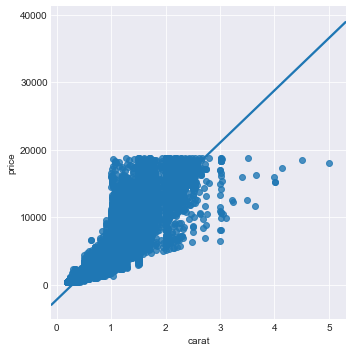

In [19]:
#make a scatterplot
sns.lmplot(x='carat', y='price', data=df)

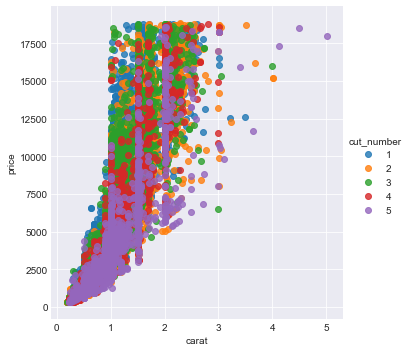

In [21]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df, 
           fit_reg=False, #remove regression line
           hue='cut_number')   #color by evolution stage

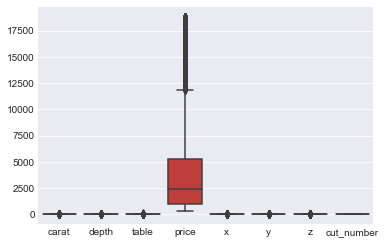

In [22]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

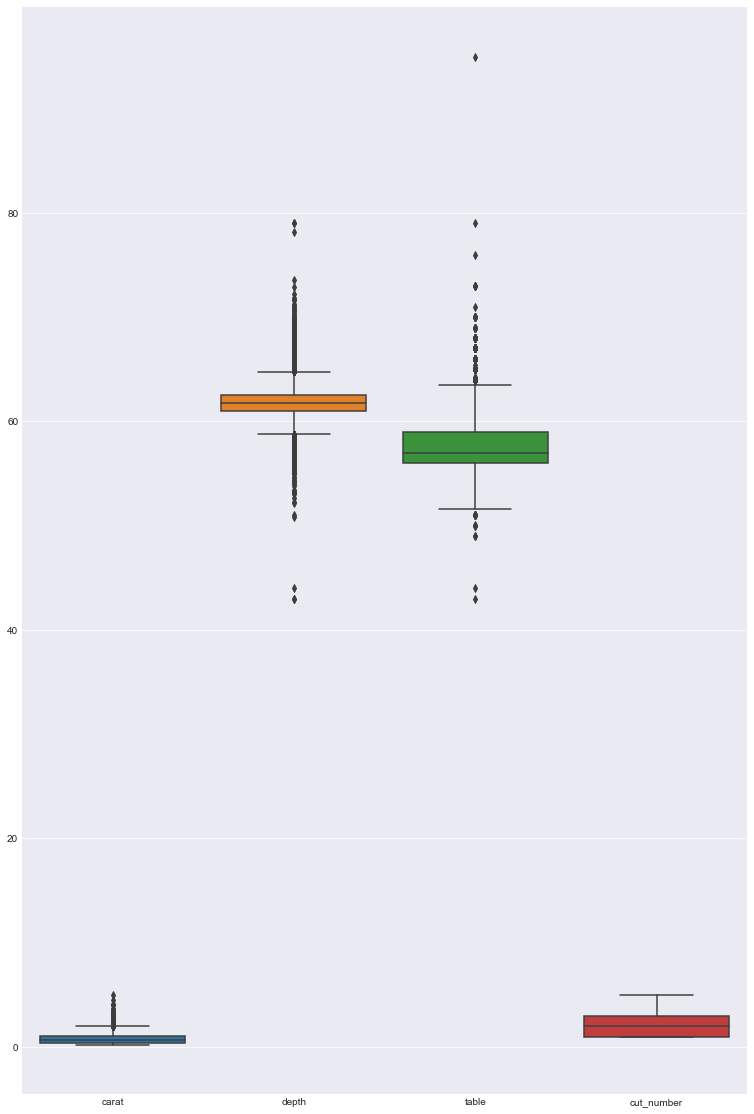

In [37]:
modeldf = df.drop(['x','y','z','price'],axis=1)
plt.subplots(figsize=(13,20))
sns.boxplot(data=modeldf)

In [27]:
#create a dataframe containing the stats for each cut type
#drop depth, x, y, z
stats_df = df.drop(['depth', 'price', 'x', 'y', 'z'], axis=1)
stats_df.head()

,carat,cut,color,clarity,table,cut_number
0,0.23,Ideal,E,SI2,55.0,1
1,0.21,Premium,E,SI1,61.0,2
2,0.23,Good,E,VS1,65.0,4
3,0.29,Premium,I,VS2,58.0,2
4,0.31,Good,J,SI2,58.0,4


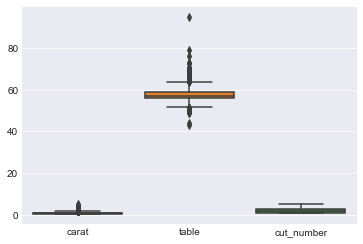

In [28]:
#boxplot for stats
sns.boxplot(data=stats_df)

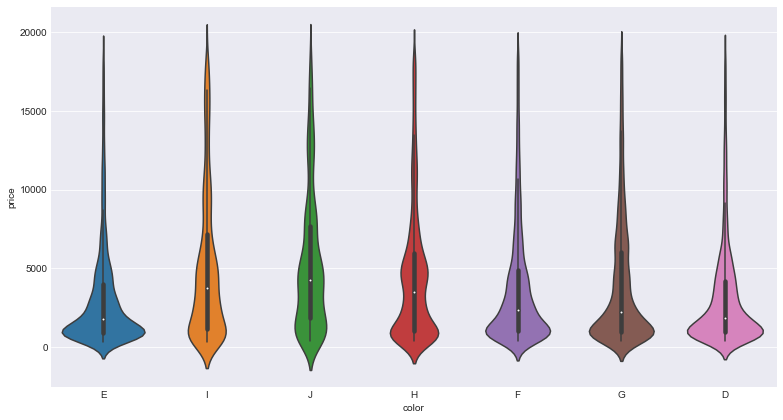

In [30]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of price for each diamond cut type
sns.violinplot(x='color', y='price', data=df)

In [ ]:
#swarm plot
# process is not finishing
plt.subplots(figsize=(10,6))
plt.scatterplot(x='color', y='cut_number', data=stats_df)

In [ ]:
#combine a violin plot with a swarm plot
# process is not finishing
plt.figure(figsize=(13,7))
sns.violinplot(x='color',
               y='price',
               data=df,
               inner=None) #removes bars inside violin plot

sns.swarmplot(x='color',
              y='price',
              data=df,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('Attack by Type')

In [ ]:
sns.factorplot('carat', 'clarity', data=modeldf, kind='box')